Initial setup, importing packages

In [71]:
import numpy as np
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
import matplotlib.pyplot as plt
import pandas_datareader as pdr
from pandas_datareader import data as pdr
import statsmodels.api as sm

Importing financial data from Yahoo Finance

In [7]:
clf = pdr.get_data_yahoo('CLF', start = '2021-01-01')

head() and tail() functions provide the first and last few rows of the data:

In [8]:
clf.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-01-04,15.020000,14.170000,14.89,14.420000,13943600,14.420000
2021-01-05,15.870000,14.400000,14.46,15.700000,17867500,15.700000
2021-01-06,17.730000,15.770000,16.00,17.420000,27988700,17.420000
2021-01-07,18.600000,17.360001,17.93,17.670000,18574800,17.670000
2021-01-08,18.059999,17.230000,17.74,18.040001,15849300,18.040001


In [9]:
clf.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-06-21,21.139999,20.350000,20.430000,20.870001,29789300,20.870001
2021-06-22,21.120001,20.469999,20.820000,20.870001,18544900,20.870001
2021-06-23,21.940001,20.969999,21.340000,21.139999,22823200,21.139999
2021-06-24,22.200001,20.940001,21.309999,21.809999,31270900,21.809999
2021-06-25,22.080000,21.200001,21.980000,21.200001,87177800,21.200001


describe() provides two more columns, "Volume" and "Adj Close" (adjusted close)

In [10]:
clf.describe()

,High,Low,Open,Close,Volume,Adj Close
count,121.000000,121.000000,121.000000,121.000000,1.210000e+02,121.000000
mean,18.522893,17.362645,17.946033,17.944463,2.387363e+07,17.944463
std,2.345349,2.188595,2.270870,2.272880,1.637013e+07,2.272880
min,14.230000,12.770000,13.990000,13.340000,7.471500e+06,13.340000
25%,16.879999,15.840000,16.350000,16.570000,1.439870e+07,16.570000
50%,18.180000,17.170000,17.690001,17.670000,1.857480e+07,17.670000
75%,20.299999,18.980000,19.510000,19.799999,2.753450e+07,19.799999
max,24.770000,23.299999,24.010000,24.440001,1.008630e+08,24.440001


The "to_csv()" and "pd.read_csv()" functions save the data to a csv file and reads the data back into Python, respectively.

The "index" and "columns" commands inspects the attributes of the indices and columns, respectively

In [12]:
clf.index

DatetimeIndex(['2021-01-04', '2021-01-05', '2021-01-06', '2021-01-07',
               '2021-01-08', '2021-01-11', '2021-01-12', '2021-01-13',
               '2021-01-14', '2021-01-15',
               ...
               '2021-06-14', '2021-06-15', '2021-06-16', '2021-06-17',
               '2021-06-18', '2021-06-21', '2021-06-22', '2021-06-23',
               '2021-06-24', '2021-06-25'],
              dtype='datetime64[ns]', name='Date', length=121, freq=None)

In [13]:
clf.columns

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

To select a certain subset or grouping of observations, we can use brackets. To select the last ten observations in the "Close" column,

In [15]:
last_ten = clf['Close'][-10:]
print(last_ten)

Date
2021-06-14    22.139999
2021-06-15    22.860001
2021-06-16    22.660000
2021-06-17    21.190001
2021-06-18    20.270000
2021-06-21    20.870001
2021-06-22    20.870001
2021-06-23    21.139999
2021-06-24    21.809999
2021-06-25    21.200001
Name: Close, dtype: float64


loc() function locates rows based on labels, while iloc() does the same, using indices instead.

In [18]:
print(clf.loc[pd.Timestamp('2021-02-14'):pd.Timestamp('2021-04-01')].head())

                 High        Low       Open      Close    Volume  Adj Close
Date                                                                       
2021-02-16  16.969999  16.400000  16.940001  16.860001  12201300  16.860001
2021-02-17  17.660000  16.580000  16.809999  17.430000  14521400  17.430000
2021-02-18  17.580000  16.590000  17.250000  16.600000  13298900  16.600000
2021-02-19  17.320000  16.719999  16.870001  17.020000  18913300  17.020000
2021-02-22  17.959999  16.680000  16.910000  17.389999  24411700  17.389999


In [19]:
print(clf.loc['2021'].head())

                 High        Low   Open      Close    Volume  Adj Close
Date                                                                   
2021-01-04  15.020000  14.170000  14.89  14.420000  13943600  14.420000
2021-01-05  15.870000  14.400000  14.46  15.700000  17867500  15.700000
2021-01-06  17.730000  15.770000  16.00  17.420000  27988700  17.420000
2021-01-07  18.600000  17.360001  17.93  17.670000  18574800  17.670000
2021-01-08  18.059999  17.230000  17.74  18.040001  15849300  18.040001


In [20]:
print(clf.iloc[0:5])

                 High        Low   Open      Close    Volume  Adj Close
Date                                                                   
2021-01-04  15.020000  14.170000  14.89  14.420000  13943600  14.420000
2021-01-05  15.870000  14.400000  14.46  15.700000  17867500  15.700000
2021-01-06  17.730000  15.770000  16.00  17.420000  27988700  17.420000
2021-01-07  18.600000  17.360001  17.93  17.670000  18574800  17.670000
2021-01-08  18.059999  17.230000  17.74  18.040001  15849300  18.040001


In [23]:
print(clf.iloc[[0,1],[0,1]])

             High    Low
Date                    
2021-01-04  15.02  14.17
2021-01-05  15.87  14.40


The sample() function randomly samples from n rows, where n is the input of the sample() function. The resample() function allows for frequency conversion of a time series.

In [24]:
print(clf.sample(10))

                 High        Low       Open      Close    Volume  Adj Close
Date                                                                       
2021-06-22  21.120001  20.469999  20.820000  20.870001  18544900  20.870001
2021-01-12  18.770000  17.990000  18.350000  18.559999  11175000  18.559999
2021-04-30  18.400000  17.000000  17.090000  17.860001  17874800  17.860001
2021-03-30  17.299999  16.010000  16.290001  17.240000  19194300  17.240000
2021-06-21  21.139999  20.350000  20.430000  20.870001  29789300  20.870001
2021-02-19  17.320000  16.719999  16.870001  17.020000  18913300  17.020000
2021-03-11  16.910000  16.090000  16.299999  16.900000  15175900  16.900000
2021-05-12  21.920000  19.700001  21.379999  19.969999  33842500  19.969999
2021-04-12  17.840000  17.330000  17.820000  17.540001  11862800  17.540001
2021-06-09  23.990000  20.389999  20.549999  23.219999  89032100  23.219999


In [26]:
print(clf.resample('M').mean())

                 High        Low       Open      Close        Volume  \
Date                                                                   
2021-01-31  17.432632  16.272632  16.852632  16.808947  1.501462e+07   
2021-02-28  16.721579  15.766842  16.294211  16.246316  2.437470e+07   
2021-03-31  16.339130  15.230870  15.707826  15.870435  1.960950e+07   
2021-04-30  18.620952  17.530476  18.159524  18.004762  2.037265e+07   
2021-05-31  20.330000  19.023500  19.630500  19.718000  2.652602e+07   
2021-06-30  22.047369  20.695263  21.391579  21.355263  3.847093e+07   

            Adj Close  
Date                   
2021-01-31  16.808947  
2021-02-28  16.246316  
2021-03-31  15.870435  
2021-04-30  18.004762  
2021-05-31  19.718000  
2021-06-30  21.355263  


We can add columns that contain more particular points of data like so: the "del" function deletes the columns.

In [27]:
clf['diff'] = clf.Close - clf.Open
#del clf['diff']
clf.head()

,High,Low,Open,Close,Volume,Adj Close,diff
Date,,,,,,,
2021-01-04,15.020000,14.170000,14.89,14.420000,13943600,14.420000,-0.470000
2021-01-05,15.870000,14.400000,14.46,15.700000,17867500,15.700000,1.240000
2021-01-06,17.730000,15.770000,16.00,17.420000,27988700,17.420000,1.420000
2021-01-07,18.600000,17.360001,17.93,17.670000,18574800,17.670000,-0.260000
2021-01-08,18.059999,17.230000,17.74,18.040001,15849300,18.040001,0.300001


To visualize data, we can use the plot() function.

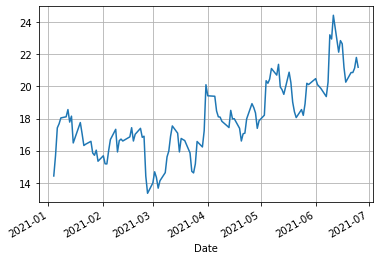

In [28]:
clf['Close'].plot(grid=True)
plt.show()

The daily percentage change is calculated with the pct_change() function (need to multiply by 100 to get the value in percent)

In [29]:
daily_close = clf[['Adj Close']]
dpc = daily_close.pct_change()
print(dpc)

            Adj Close
Date                 
2021-01-04        NaN
2021-01-05   0.088766
2021-01-06   0.109554
2021-01-07   0.014351
2021-01-08   0.020939
...               ...
2021-06-21   0.029600
2021-06-22   0.000000
2021-06-23   0.012937
2021-06-24   0.031693
2021-06-25  -0.027969

[121 rows x 1 columns]


To replace NA values with 0:

In [30]:
dpc.fillna(0, inplace = True)
print(dpc)

            Adj Close
Date                 
2021-01-04   0.000000
2021-01-05   0.088766
2021-01-06   0.109554
2021-01-07   0.014351
2021-01-08   0.020939
...               ...
2021-06-21   0.029600
2021-06-22   0.000000
2021-06-23   0.012937
2021-06-24   0.031693
2021-06-25  -0.027969

[121 rows x 1 columns]


For the log return:

In [31]:
log_return = np.log(daily_close.pct_change()+1)
print(log_return)

            Adj Close
Date                 
2021-01-04        NaN
2021-01-05   0.085045
2021-01-06   0.103958
2021-01-07   0.014249
2021-01-08   0.020723
...               ...
2021-06-21   0.029171
2021-06-22   0.000000
2021-06-23   0.012854
2021-06-24   0.031202
2021-06-25  -0.028367

[121 rows x 1 columns]


To calculate monthly or quarterly returns, use resample(). 'BM' and '4M' stand for business months and quarters, respectively.

In [32]:
monthly = clf.resample('BM').mean()
# monthly = clf.resample('BM').apply(lambda x: x[-1])
# The above line will take the last entry of the month as the value.
print(monthly.pct_change())

                High       Low      Open     Close    Volume  Adj Close  \
Date                                                                      
2021-01-29       NaN       NaN       NaN       NaN       NaN        NaN   
2021-02-26 -0.040789 -0.031082 -0.033136 -0.033472  0.623398  -0.033472   
2021-03-31 -0.022872 -0.033994 -0.035987 -0.023136 -0.195498  -0.023136   
2021-04-30  0.139654  0.150983  0.156081  0.134484  0.038918   0.134484   
2021-05-31  0.091781  0.085167  0.081003  0.095155  0.302041   0.095155   
2021-06-30  0.084475  0.087879  0.089711  0.083034  0.450309   0.083034   

                diff  
Date                  
2021-01-29       NaN  
2021-02-26  0.096378  
2021-03-31 -4.395126  
2021-04-30 -1.951744  
2021-05-31 -1.565386  
2021-06-30 -1.415034  


In [33]:
quarter = clf.resample('4M').mean()
print(quarter.pct_change())

                High       Low      Open     Close    Volume  Adj Close  \
Date                                                                      
2021-01-31       NaN       NaN       NaN       NaN       NaN        NaN   
2021-05-31  0.030577  0.035437  0.032930  0.036568  0.502539   0.036568   
2021-09-30  0.227195  0.228258  0.228865  0.225651  0.705268   0.225651   

                diff  
Date                  
2021-01-31       NaN  
2021-05-31 -1.366815  
2021-09-30 -3.266304  


The same calculation can be done using the shift() function.

In [34]:
dpc = daily_close / daily_close.shift(1) - 1
print(dpc)

            Adj Close
Date                 
2021-01-04        NaN
2021-01-05   0.088766
2021-01-06   0.109554
2021-01-07   0.014351
2021-01-08   0.020939
...               ...
2021-06-21   0.029600
2021-06-22   0.000000
2021-06-23   0.012937
2021-06-24   0.031693
2021-06-25  -0.027969

[121 rows x 1 columns]


We can plot the distribution of the daily percentage change, which roughly follows the normal distribution.

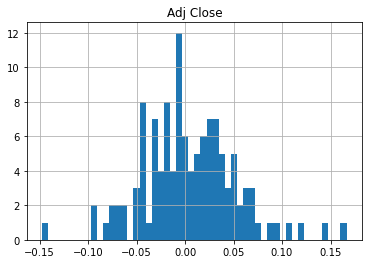

        Adj Close
count  120.000000
mean     0.004374
std      0.048536
min     -0.147337
25%     -0.026234
50%     -0.000329
75%      0.032809
max      0.166473


In [38]:
dpc.hist(bins=50)
plt.show()
print(dpc.describe())

Next, we calculate the cumulative daily return:

            Adj Close
Date                 
2021-01-04        NaN
2021-01-05   1.088766
2021-01-06   1.208044
2021-01-07   1.225381
2021-01-08   1.251040
...               ...
2021-06-21   1.447295
2021-06-22   1.447295
2021-06-23   1.466019
2021-06-24   1.512483
2021-06-25   1.470180

[121 rows x 1 columns]


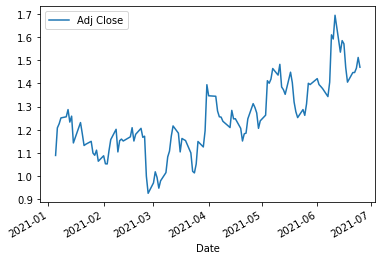

In [41]:
cdr = (1 + dpc).cumprod()
print(cdr)
cdr.plot()
plt.show()

The same for cumulative monthly return:

In [42]:
cmr = cdr.resample('M').mean()
print(cmr)

            Adj Close
Date                 
2021-01-31   1.174873
2021-02-28   1.126652
2021-03-31   1.100585
2021-04-30   1.248597
2021-05-31   1.367406
2021-06-30   1.480948


To compare stocks, we first make a function that easily retrieves stock information: here we will compare some popular stocks.

In [48]:
def get(tickers, startdate, enddate):
    def data(ticker):
        return (pdr.get_data_yahoo(ticker, start = startdate, end = enddate))
    datas = map (data,tickers)
    return(pd.concat(datas, keys = tickers, names = ['Ticker', 'Date']))

tickers = ['AAPL', 'MSFT', 'IBM', 'GOOG']
all_data = get(tickers, '2021-01-01', '2021-04-01')
print(all_data)

                          High          Low         Open        Close  \
Ticker Date                                                             
AAPL   2021-01-04   133.610001   126.760002   133.520004   129.410004   
       2021-01-05   131.740005   128.429993   128.889999   131.009995   
       2021-01-06   131.050003   126.379997   127.720001   126.599998   
       2021-01-07   131.630005   127.860001   128.360001   130.919998   
       2021-01-08   132.630005   130.229996   132.429993   132.050003   
...                        ...          ...          ...          ...   
GOOG   2021-03-26  2050.989990  2014.020020  2038.859985  2035.550049   
       2021-03-29  2058.429932  2015.619995  2027.880005  2055.949951   
       2021-03-30  2070.780029  2044.030029  2057.629883  2055.540039   
       2021-03-31  2093.326904  2056.745117  2059.120117  2068.629883   
       2021-04-01  2142.939941  2096.889893  2097.949951  2137.750000   

                        Volume    Adj Close  
Tick

Some plots:

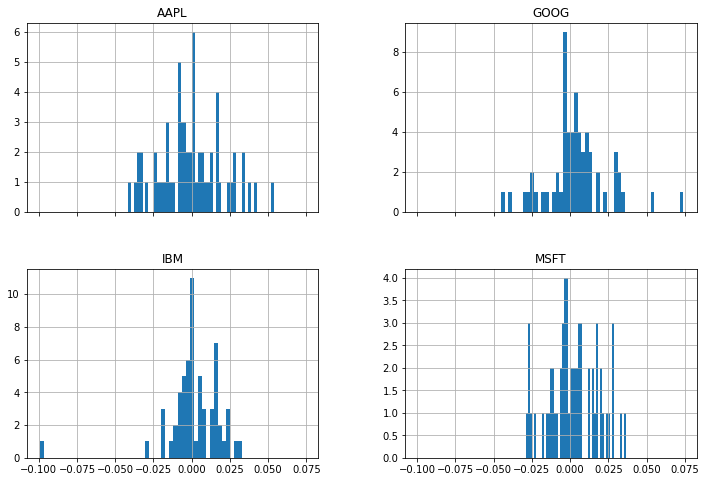

In [49]:
daily_close_px = all_data[['Adj Close']].reset_index().pivot('Date', 'Ticker', 'Adj Close')
dpc = daily_close_px.pct_change()
dpc.hist(bins = 50, sharex = True, figsize = (12,8))
plt.show()

Scatter plot (the alpha argument controls the transparency, 'kde'=Kernel Density Estimate)

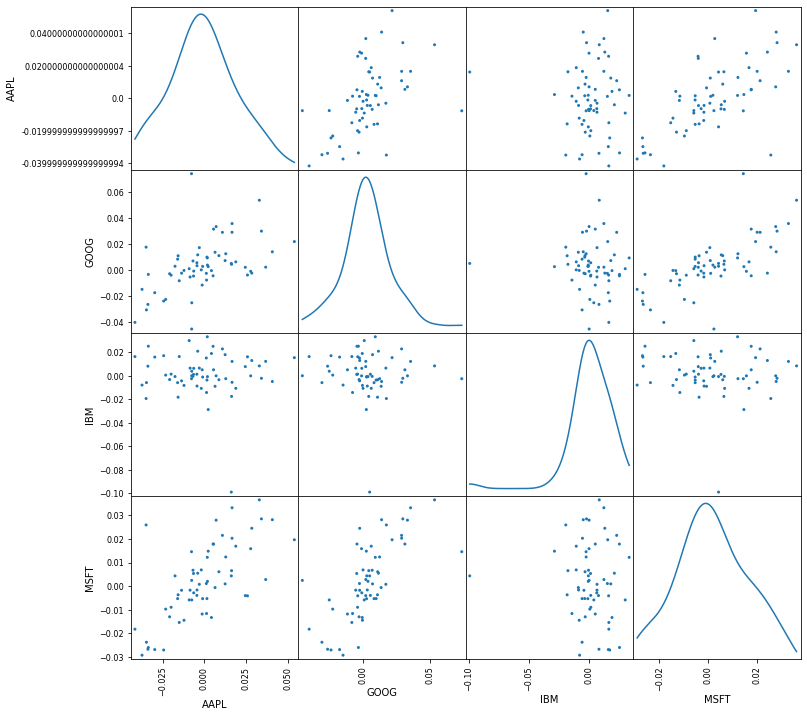

In [53]:
pd.plotting.scatter_matrix(dpc, diagonal = 'kde', alpha = 1, figsize = (12,12))
plt.show()

Moving windows

In [54]:
adj_close_px = clf['Adj Close']
moving_avg = adj_close_px.rolling(window = 40).mean()
# can do this with mean, median, variance, etc.
print(moving_avg[-10:])

Date
2021-06-14    19.61425
2021-06-15    19.75100
2021-06-16    19.90250
2021-06-17    20.00600
2021-06-18    20.08550
2021-06-21    20.15775
2021-06-22    20.20625
2021-06-23    20.26750
2021-06-24    20.35400
2021-06-25    20.44925
Name: Adj Close, dtype: float64


Plot for comprehension

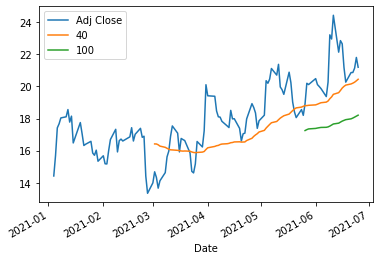

In [55]:
clf['40'] = adj_close_px.rolling(window = 40).mean()
clf['100'] = adj_close_px.rolling(window = 100).mean()
clf[['Adj Close', '40', '100']].plot()
plt.show()

The rolling mean tells us the mean of 'Adj Close' for the past n days, where n is the window size. It is continually updated as we shift the window forward. It's one way to smooth data and evaluate overall trends in financial data.

Volatility: the change in the variance of the returns of a stock. One way to define and quantify risk.

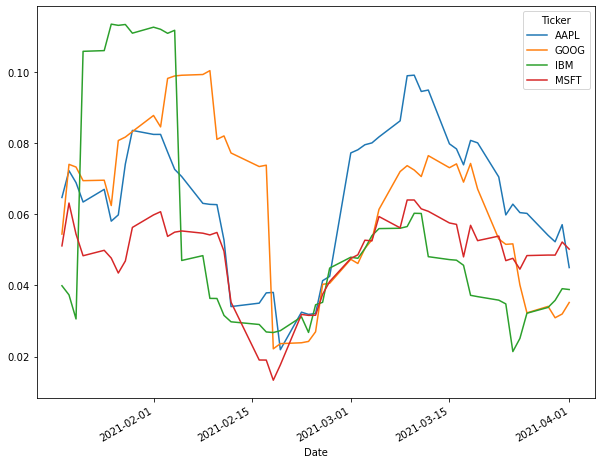

In [62]:
min_periods = 10
volatility = dpc.rolling(min_periods).std() * np.sqrt(min_periods)
# note that dpc = daily percentage change
volatility.plot(figsize = (10,8))
plt.show()

Ordinary Least Squares Regression

In [73]:
all_adj_close = all_data[['Adj Close']]
all_returns = np.log(all_adj_close / all_adj_close.shift(1))
# the above is the log of the daily returns

aapl_returns = all_returns.iloc[all_returns.index.get_level_values('Ticker') == 'AAPL']
aapl_returns.index = aapl_returns.index.droplevel('Ticker')
msft_returns = all_returns.iloc[all_returns.index.get_level_values('Ticker') == 'MSFT']
msft_returns.index = msft_returns.index.droplevel('Ticker')
# isolating returns

return_data = pd.concat([aapl_returns, msft_returns], axis = 1)[1:]
return_data.columns = ['AAPL', 'MSFT']
# new data object with columns of apple and microsoft returns

X = sm.add_constant(return_data['AAPL'])

model = sm.OLS(return_data['MSFT'], X).fit()

print(model.summary())



                            OLS Regression Results                            
Dep. Variable:                   MSFT   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.475
Method:                 Least Squares   F-statistic:                     55.34
Date:                Sun, 27 Jun 2021   Prob (F-statistic):           4.88e-10
Time:                        20:05:45   Log-Likelihood:                 186.55
No. Observations:                  61   AIC:                            -369.1
Df Residuals:                      59   BIC:                            -364.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0022      0.001      1.506      0.1

Plotting:

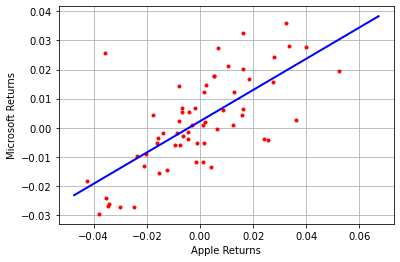

In [74]:
plt.plot(return_data['AAPL'], return_data['MSFT'], 'r.')
ax = plt.axis()
x = np.linspace(ax[0], ax[1] + 0.01)
plt.plot(x, model.params[0] + model.params[1] * x, 'b' , lw=2)
plt.grid(True)
plt.axis('tight')
plt.xlabel('Apple Returns')
plt.ylabel('Microsoft Returns')

plt.show()